In [ ]:
from google.colab import drive

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 47kB/s 
     |████████████████████████████████| 419kB 55.7MB/s 
     |████████████████████████████████| 3.0MB 50.3MB/s 


In [ ]:
import tensorflow as tf

In [ ]:
def save_to_file(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as output:
        pickle.dump(objeto, output, pickle.HIGHEST_PROTOCOL)


def load_file(nome_arquivo):
    with open(nome_arquivo, 'rb') as input:
        objeto = pickle.load(input)
    return objeto

In [ ]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
root_path = 'gdrive/My Drive/OCR_OUTRUN/'

In [ ]:
numbers = load_file(root_path+'numbers_1.pkl')

In [ ]:
numbers = np.concatenate((numbers,load_file(root_path+'numbers_2.pkl')))

In [ ]:
numbers.shape

(4584,)

In [ ]:
images = np.concatenate((load_file(root_path+'images_1.pkl'),load_file(root_path+'images_2.pkl')))

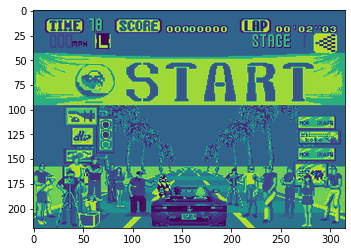

In [ ]:
plt.imshow(images[0])

In [ ]:
images[0].shape

(220, 315)

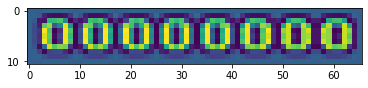

In [ ]:
plt.imshow(images[0][14:25,132:198])

In [ ]:
def return_only_numbers(i):
    return np.expand_dims(np.array(i[14:25,132:198]), axis=-1)

In [ ]:
img_numbers = [ return_only_numbers(i) for i in images ]

In [ ]:
img_numbers = np.array(img_numbers)

In [ ]:
len(img_numbers)

4584

### Parameter

In [ ]:
# useful methods
def captcha_to_vec(captcha):    
    vector = np.zeros(word_len * word_class)
    
    for i,ch in enumerate(captcha):
        idex = i * word_class + char_indices[ch]
        vector[idex] = 1
    return vector

def vec_to_captcha(vec):
    text = []
    vec[vec < 0.5] = 0
        
    char_pos = vec.nonzero()[0]
    
    for i, ch in enumerate(char_pos):
        text.append(captcha_word[ch % word_class])
    return ''.join(text)


In [ ]:
# parameters

captcha_word = "0123456789"

word_len = 8
word_class = len(captcha_word)

char_indices = dict((c, i) for i,c in enumerate(captcha_word))
indices_char = dict((i, c) for i,c in enumerate(captcha_word))

In [ ]:
captcha_to_vec(str(numbers[789])),len(captcha_to_vec(str(numbers[789])))

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 80)

In [ ]:
vec_numbers = np.array([captcha_to_vec(str(i)) for i in numbers])

In [ ]:
len(vec_numbers)

4584

# Developing the model

In [ ]:
input_shape =  (11, 66, 1)
print(input_shape)

(11, 66, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(list(np.arange(0,len(vec_numbers))), list(np.arange(0,len(vec_numbers))), test_size=0.1, random_state=42)

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=80, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 11, 66, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 66, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 33, 32)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 5, 33, 64)         18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 5, 33, 64)         36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 16, 64)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)             

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
#model.fit(img_numbers[X_train], vec_numbers[y_train], epochs=12)
model.fit(img_numbers, vec_numbers, epochs=12)

Epoch 1/12
4584/4584 [==============================] - 1s 284us/sample - loss: 0.2182 - accuracy: 0.9327
Epoch 2/12
4584/4584 [==============================] - 1s 219us/sample - loss: 0.0356 - accuracy: 0.9876
Epoch 3/12
4584/4584 [==============================] - 1s 215us/sample - loss: 0.0104 - accuracy: 0.9966
Epoch 4/12
4584/4584 [==============================] - 1s 231us/sample - loss: 0.0047 - accuracy: 0.9986
Epoch 5/12
4584/4584 [==============================] - 1s 221us/sample - loss: 0.0033 - accuracy: 0.9989
Epoch 6/12
4584/4584 [==============================] - 1s 222us/sample - loss: 0.0026 - accuracy: 0.9993
Epoch 7/12
4584/4584 [==============================] - 1s 223us/sample - loss: 0.0026 - accuracy: 0.9992
Epoch 8/12
4584/4584 [==============================] - 1s 228us/sample - loss: 0.0019 - accuracy: 0.9995
Epoch 9/12
4584/4584 [==============================] - 1s 224us/sample - loss: 0.0012 - accuracy: 0.9997
Epoch 10/12
4584/4584 [=======================

In [ ]:
test_loss, test_accuracy = model.evaluate(img_numbers[X_test], vec_numbers[y_test])

459/459 [==============================] - 0s 230us/sample - loss: 0.0013 - accuracy: 0.9996


In [ ]:
model.save(root_path+'modelo_captcha_outrun')

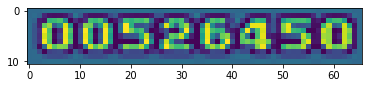

00526450


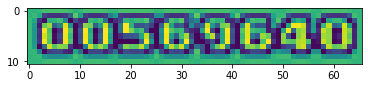

00569640


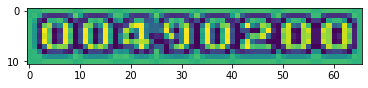

00490200


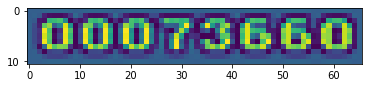

00073660


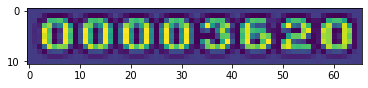

00003620


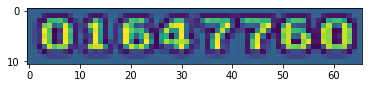

01647760


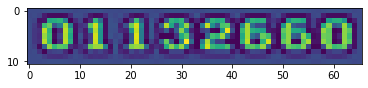

01132660


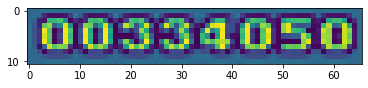

00334050


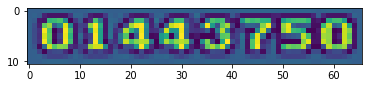

0144350


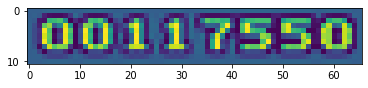

00117550


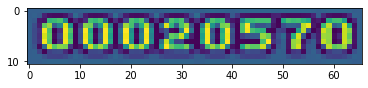

00020570


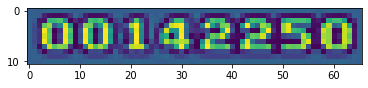

00142250


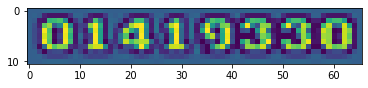

01419330


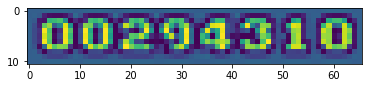

00294310


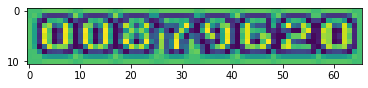

00879620


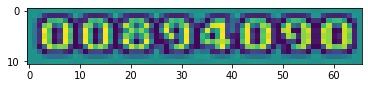

00894090


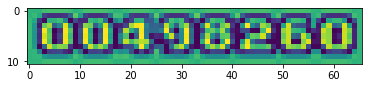

00498260


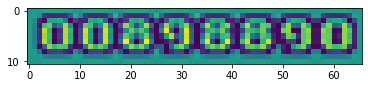

00898890


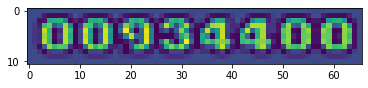

00934400


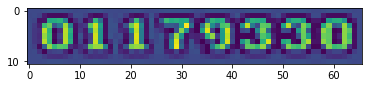

01179330


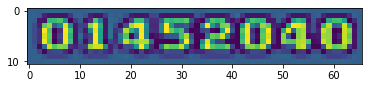

01452040


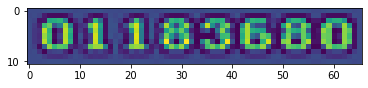

01183680


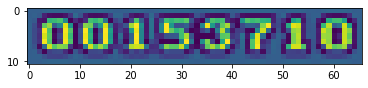

00153710


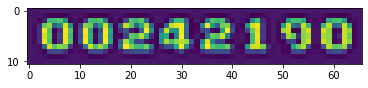

00242190


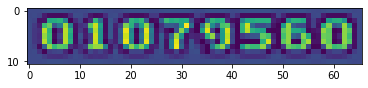

01079560


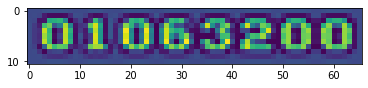

01063200


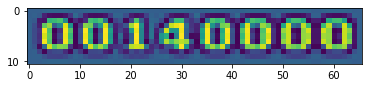

00140000


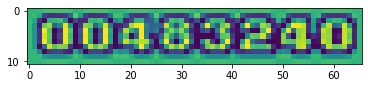

00483240


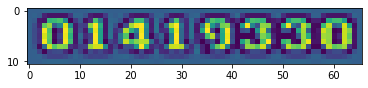

01419330


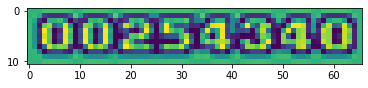

002543340


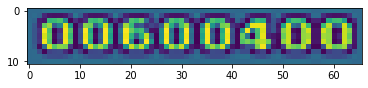

00600400


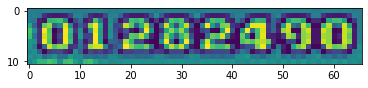

01282490


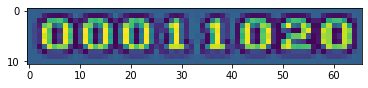

00011020


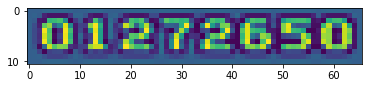

01272650


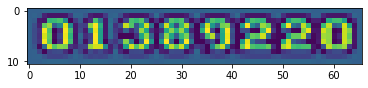

01389220


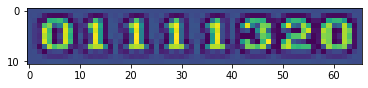

01111320


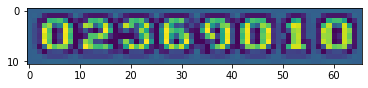

02369010


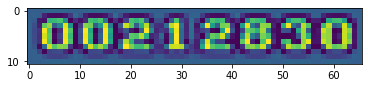

00212830


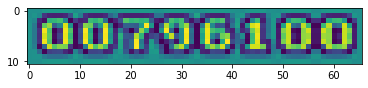

0096100


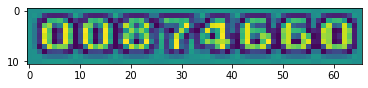

00874660


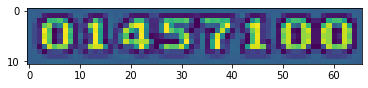

01457100


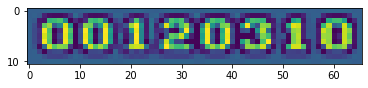

00120310


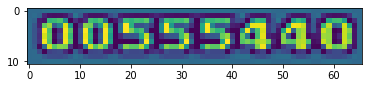

00555440


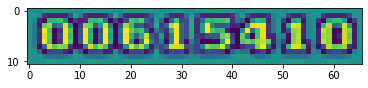

00615410


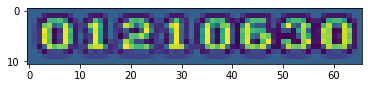

01210630


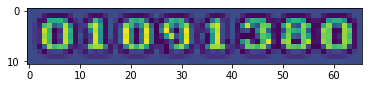

01091380


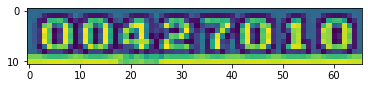

00427010


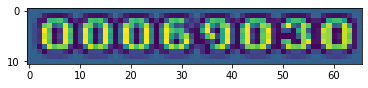

00069030


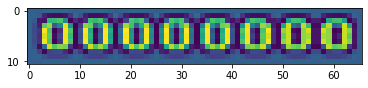

00000000


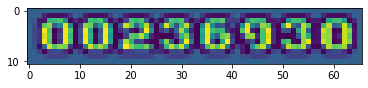

00236930


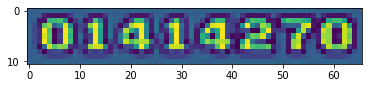

01414270


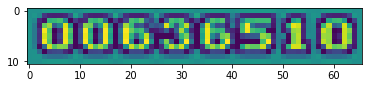

00636510


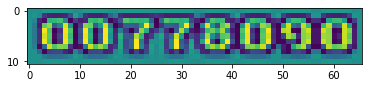

00778090


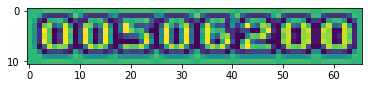

00506200


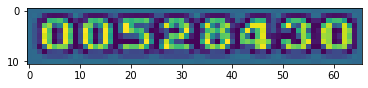

00528430


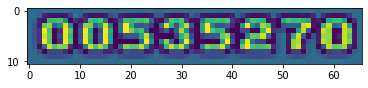

00535270


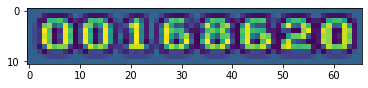

00168620


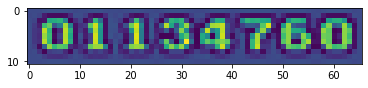

01134760


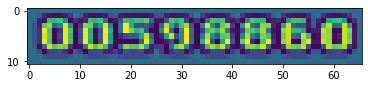

00598860


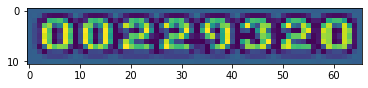

00229320


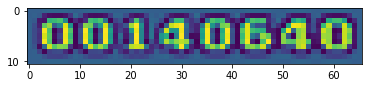

00140640


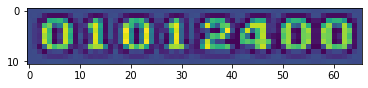

01012400


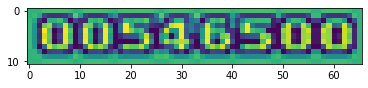

00546500


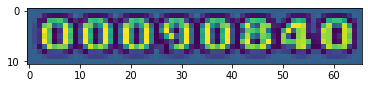

00090840


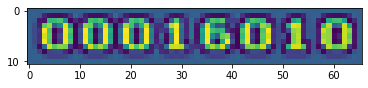

00016010


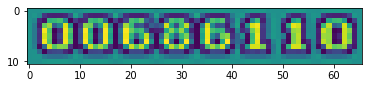

00686110


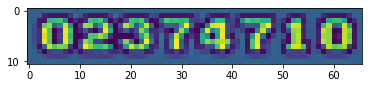

02374710


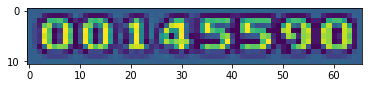

00145590


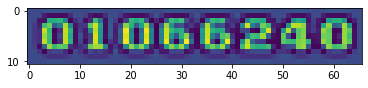

01066240


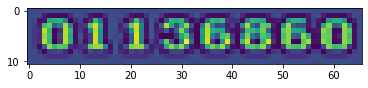

01136860


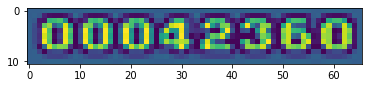

00042360


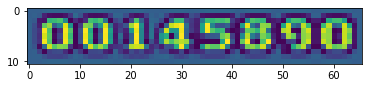

00145890


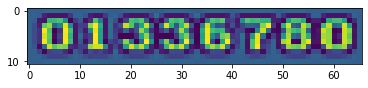

01336780


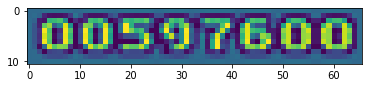

00597600


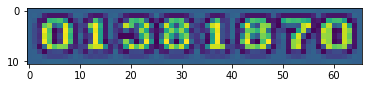

01381870


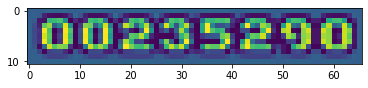

00235290


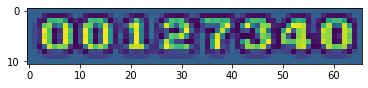

00127340


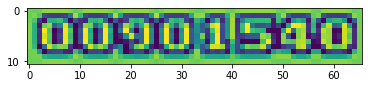

00901540


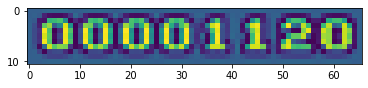

00001120


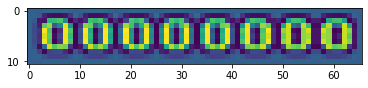

00000000


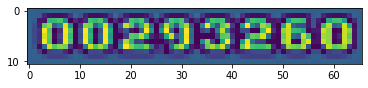

00293260


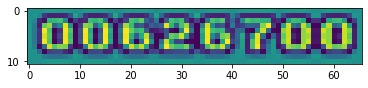

00626700


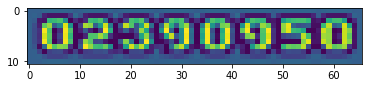

02390950


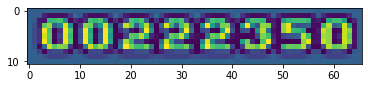

00222350


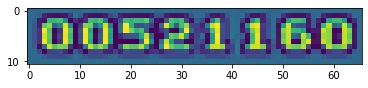

00521160


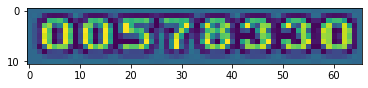

005781330


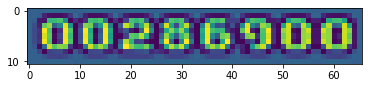

00286900


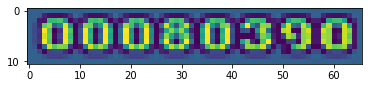

00080390


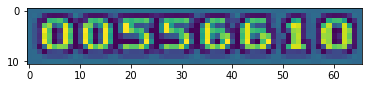

00556610


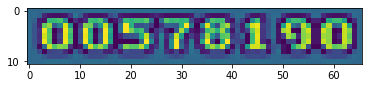

00578190


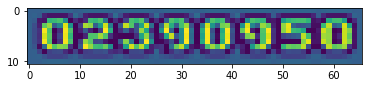

02390950


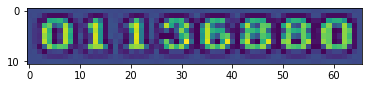

01136880


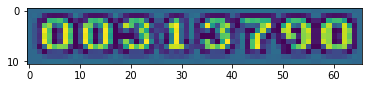

00313790


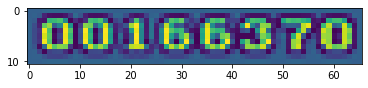

00166370


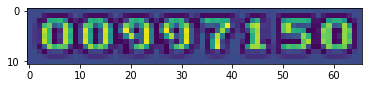

00997150


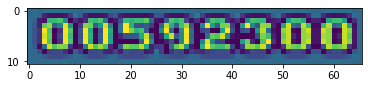

00592300


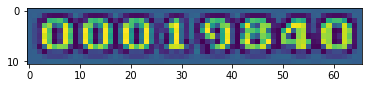

00019840


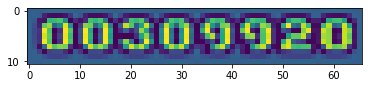

00309920


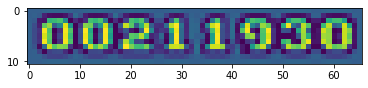

00211930


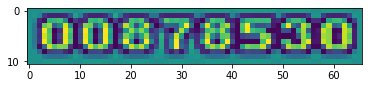

00878530


In [ ]:
for i in np.random.randint(0,len(img_numbers),100):
    plt.imshow(img_numbers[i][:,:,0])
    plt.show()
    print(vec_to_captcha(model.predict(np.expand_dims(img_numbers[i],axis=0))[0]))